In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# load the dataset
data=pd.read_csv('Elon_musk.csv' ,encoding='Latin-1')
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
data = [ Text.strip() for Text in data.Text ] # remove both the leading and the trailing characters
data = [Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [5]:
# Joining the list into one string/text
text = ' '.join(data)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [6]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))

no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:

from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:10])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']


In [9]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
print(no_stop_tokens[0:40]) #len(no_stop_tokens)

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [11]:
#Normalize the data, convert everything to lowercase
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [28]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:20])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul']


In [13]:
!python -m spacy download en

2023-10-17 08:14:29.397197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [15]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [16]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [18]:
vectorizer.vocabulary_

{'kunalb11': 2702,
 'alien': 231,
 'idaacarmack': 2440,
 'ray': 3621,
 'trace': 4498,
 'cyberpunk': 962,
 'hdr': 1677,
 'nextlevel': 3157,
 'have': 1671,
 'try': 4532,
 'joerogan': 2622,
 'spotify': 4116,
 'great': 1609,
 'interview': 2551,
 'gtera27': 1628,
 'doge': 1115,
 'underestimate': 4665,
 'teslacn': 4343,
 'congratulations': 856,
 'tesla': 4337,
 'china': 740,
 'amazing': 257,
 'execution': 1326,
 'last': 2721,
 'year': 4938,
 'now': 3197,
 'next': 3156,
 'even': 1298,
 'happy': 1658,
 'new': 3153,
 'ox': 3314,
 'httpstco9wfkmyu2oj': 1867,
 'frodo': 1494,
 'underdoge': 4664,
 'all': 234,
 'thought': 4422,
 'would': 4913,
 'fail': 1362,
 'himself': 1723,
 'httpstcozgxjfdzzrm': 2400,
 'owensparks': 3311,
 'flcnhvy': 1436,
 'anonyx10': 286,
 'haha': 1643,
 'thanks': 4381,
 'indeed': 2489,
 'tweets': 4555,
 'definitely': 1017,
 'represent': 3704,
 'realworld': 3646,
 'time': 4441,
 'allocation': 236,
 'the': 4388,
 'entertaining': 1254,
 'outcome': 3291,
 'likely': 2783,
 'givedir

In [19]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T

,0
kunalb11,2702
alien,231
idaacarmack,2440
ray,3621
trace,4498
...,...
httpstcowjrzibkh1h,2332
click,774
samwise,3821
gamgee,1530


In [20]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head()

,0
ðogecoin,4970
zzcool,4969
zwiebelbach,4968
zubinanary,4967
zshauladventure,4966


In [21]:
print(vectorizer.vocabulary_)

{'kunalb11': 2702, 'alien': 231, 'idaacarmack': 2440, 'ray': 3621, 'trace': 4498, 'cyberpunk': 962, 'hdr': 1677, 'nextlevel': 3157, 'have': 1671, 'try': 4532, 'joerogan': 2622, 'spotify': 4116, 'great': 1609, 'interview': 2551, 'gtera27': 1628, 'doge': 1115, 'underestimate': 4665, 'teslacn': 4343, 'congratulations': 856, 'tesla': 4337, 'china': 740, 'amazing': 257, 'execution': 1326, 'last': 2721, 'year': 4938, 'now': 3197, 'next': 3156, 'even': 1298, 'happy': 1658, 'new': 3153, 'ox': 3314, 'httpstco9wfkmyu2oj': 1867, 'frodo': 1494, 'underdoge': 4664, 'all': 234, 'thought': 4422, 'would': 4913, 'fail': 1362, 'himself': 1723, 'httpstcozgxjfdzzrm': 2400, 'owensparks': 3311, 'flcnhvy': 1436, 'anonyx10': 286, 'haha': 1643, 'thanks': 4381, 'indeed': 2489, 'tweets': 4555, 'definitely': 1017, 'represent': 3704, 'realworld': 3646, 'time': 4441, 'allocation': 236, 'the': 4388, 'entertaining': 1254, 'outcome': 3291, 'likely': 2783, 'givedirectly': 1579, 'just': 2649, 'send': 3889, 'agree': 200, 

In [22]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(X.toarray().shape)

(15794, 4971)


In [24]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(3,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data)

In [25]:
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 485 stored elements in Compressed Sparse Row format>

In [26]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['2192 https co' '60 starlink satellites'
 'ajtourville comma_ai tesmanian_com'
 'alex_avoigt mike_zimon wholemarsblog' 'also https co' 'are going to'
 'as soon as' 'astrobehnken and astro_doug' 'at https co' 'be able to'
 'brendan2908 bocachicagal nasaspaceflight'
 'caspar_stanley ercxspace marcushousegame' 'cfs_energy cup_plasma mit'
 'confirmed https co' 'course still love' 'crew dragon first'
 'dragon first operational' 'droneship https co' 'entertaining outcome is'
 'ercxspace marcushousegame felixschlang'
 'erdayastronaut josh_bickett ajtourville'
 'erdayastronaut queue_max nasaspaceflight' 'falcon first stage'
 'first operational mission' 'first stage has' 'flight https co'
 'from the space_station' 'futurejurvetson cfs_energy cup_plasma'
 'haha https co' 'has landed on' 'home to earth'
 'icannot_enough flcnhvy tesla' 'in https co' 'is 0001f525 0001f525'
 'is https co' 'it https co' 'it should be' 'it will be'
 'jgrano305 teslaratiteam teslarati' 'josh_bickett ajtourville spacex

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(2,3), max_features = 10)
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(data)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())


['0001f923 0001f923' 'https co' 'in the' 'of the' 'rt spacex' 'this is'
 'to be' 'to the' 'we re' 'will be']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40))    # Set figure size
    plt.imshow(wordcloud)           # Display image
    plt.axis("off")

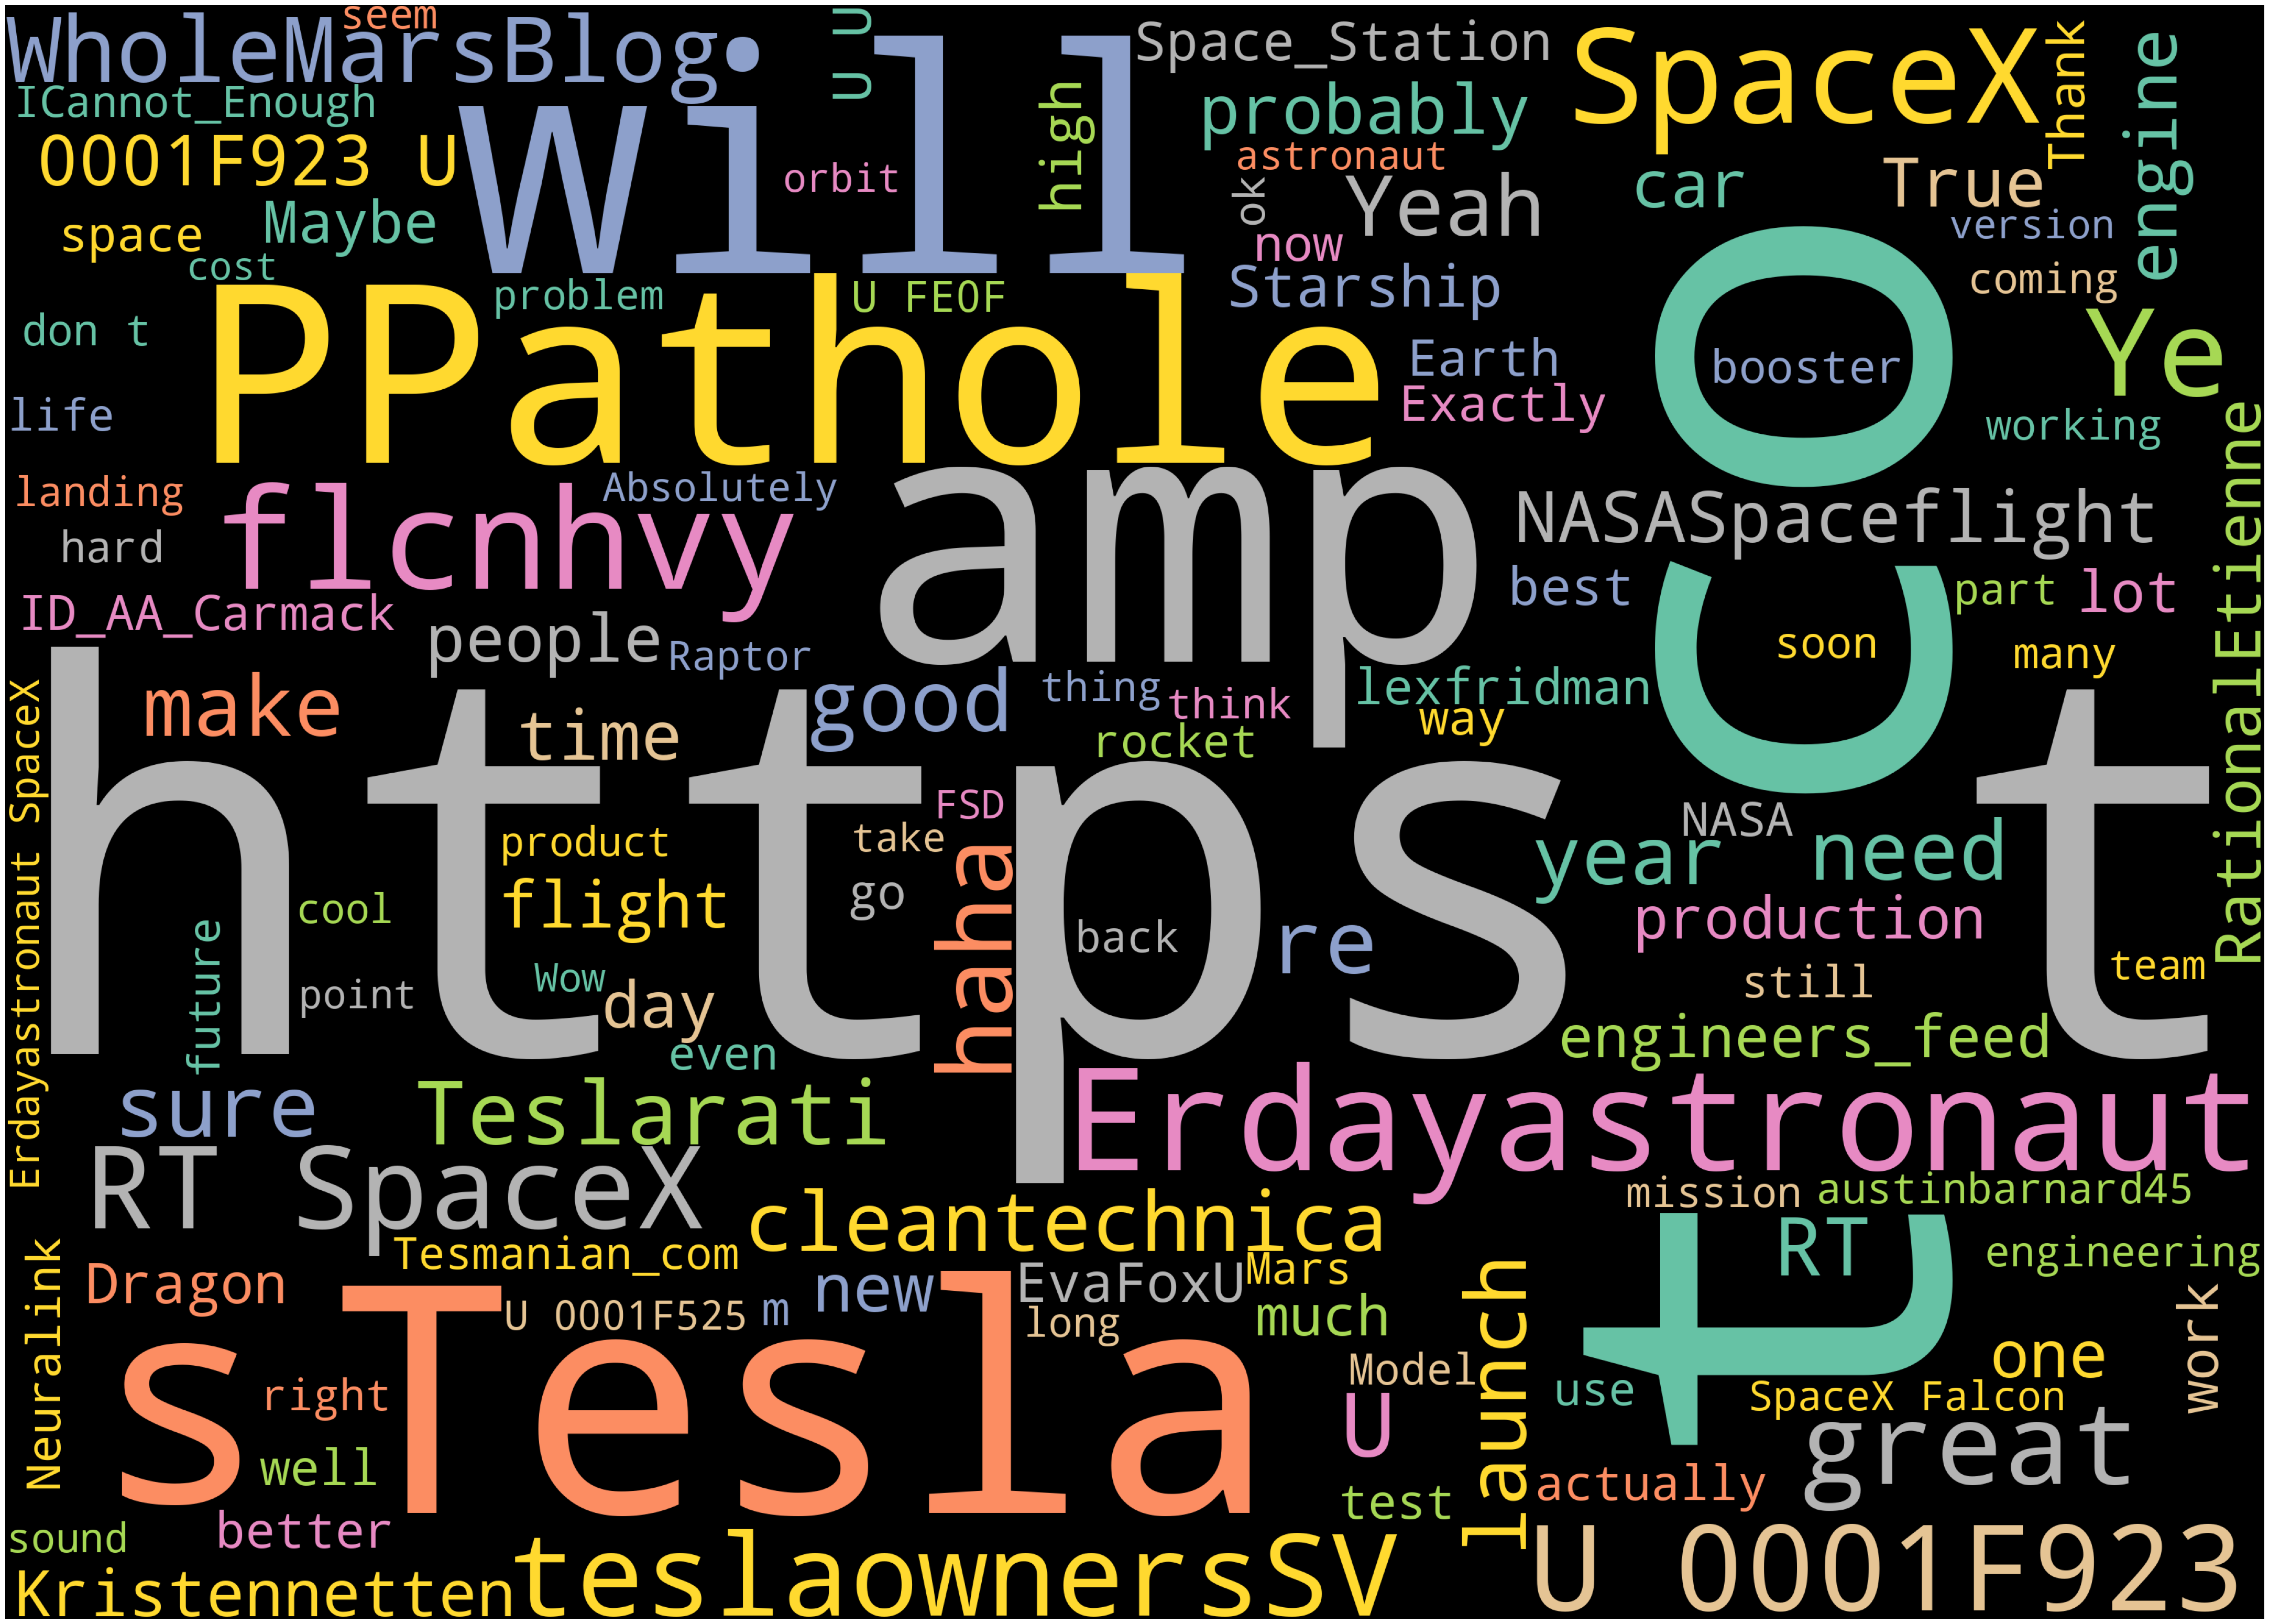

In [33]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500,
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)